# Øvelse 4 - Michaelis-Menten 

## Innledning om Michaelis - Menten 

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Ved å bruke python har vi bedre kontroll over databehandlingen, men det krever at vi må spesifisere hva vi vil oppnå med kode. Nedover i dette arbeidsarket skal vi se på hvordan vi henter inn resultatene fra laboratoriet og bedømmer Km og Vmax ved bruk av 3 metoder. 

1. Bedømme Km og Vmax visuellt
2. Bedømme Km og Vmax med kurvetilpassning 
3. Bedømme Km og Vmax ved bruk av Lineweaver-Burke plot

### 1.Bedømme Km og Vmax visuellt 

Ved å bedømme Km og Vmax visuellt, så ser vi på grafen av [v] mot [S] og bestemmer en horisontal linje som går parallellt med den hyperbole kurven. Nedenfor skal dere endre på Vmax verdien slik at den ligger parallellt med de eksperimentelle resultatene deres.    

In [2]:
fil = open('Data.csv','r')                            # For å få tilgang til dataen vår, så må vi åpne filene, her skriver vi inn navnet på filen og r for at vi skal lese (read) deretter lagres dataen som variablen fil  
data = pd.read_csv(fil, header = None, skiprows = 1)  # Videre må vi justere litt på filen for å hente ut den infromasjonen vi tenger, vi kan kun lese inn nummer her, derfor hopper vi over første linje (skiprows) og sier at det ikke overskrifter i file (Header = None) 
                                                      #
S = (data[0])                                         #I python teller vi fra og med 0, vi henter derfor inn substrat konsentrasjonene S fra kolonne 0
v = (data[1])                                         #Dertter henter vi inn initial hastighetene fra kollonne 1      

In [3]:
print(data) #Det første vi ønsker å gjøre er å se på at vi har lest inn filene våre riktig, hvordan ser dette ut iforhold til csv filen deres?

          0        1   2   3
0  0.000000  0.00000 NaN NaN
1  0.000008  0.00015 NaN NaN
2  0.000017  0.00020 NaN NaN
3  0.000034  0.00035 NaN NaN
4  0.000068  0.00055 NaN NaN
5  0.000101  0.00055 NaN NaN
6  0.000169  0.00075 NaN NaN
7  0.000337  0.00080 NaN NaN
8  0.000840  0.00085 NaN NaN
9  0.002940  0.00090 NaN NaN


Ved å visuellt bedømme grafen er Vmax:0.0009


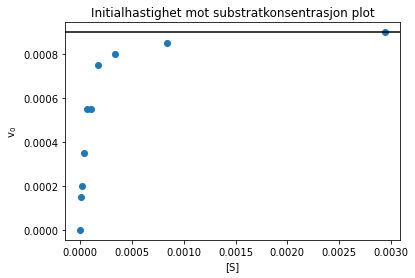

In [4]:
plt.scatter(S,v)
plt.title('Initialhastighet mot substratkonsentrasjon plot')
plt.xlabel('[S]')
plt.ylabel('v$_0$')

Vmax = 0.0009
Km = Vmax/2
plt.axhline(Vmax, color = 'black')

print(('Ved å visuellt bedømme grafen er Vmax:{}').format(Vmax))



For å bedømme Km så vet vi at det er substrat konsentrasjonen med Vmax/2. I denne grafen ser vi at det blir litt vanskelig å lett bedømme Km, vi kan derfor endre litt på innstillingene for å lettere bestemme Km

Ved å visuellt bedømme grafen er Vmax:0.0009 og Km:5e-05


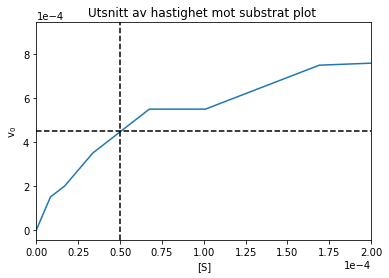

In [5]:
plt.plot(S,v)
plt.title('Utsnitt av hastighet mot substrat plot ')
plt.xlabel('[S]')
plt.ylabel('v$_0$')
plt.xlim(0,0.0002)
plt.ticklabel_format(axis = 'both', style = 'sci', scilimits=(0,0))


Vmax = 0.0009
Vmax_halve = Vmax/2
Km = 0.00005


plt.axhline(Vmax_halve, color = 'black', linestyle = '--')
plt.axvline(Km, color = 'black', linestyle = '--' )


print(('Ved å visuellt bedømme grafen er Vmax:{} og Km:{}').format(Vmax, Km))

### 2. Bedømme Km og Vmax med kurvetilpassning

Ved å bedømme Km og Vmax ved bruk at kurvetilpassning så bruker vi Michaelis-Menten funksjonen $v = Vmax[S]/Km + [S]$ til å beregne Km og Vmax verdier som passer de eksperiemtelle resultatene best. Dette gjøres ved å gjennomføre en minste kvadraters metode for hvert punkt. Dette er noe som gjøres mye i databehandling, og det fine med python er at det vil alltid finnes noen som har gjort det dere lurer på før dere. Dette kan vi benytte og noen har skrevet kode for å gjennomføre kurvetilpassing for oss. 

In [6]:
def Michaelis_Menten_Funksjonen(S, km, vmax):
        return((km*S)/(vmax+S))


pars, cov = curve_fit(f = Michaelis_Menten_Funksjonen, xdata = S,ydata = v)



In [7]:
xModel = np.linspace(min(S), max(S))
yModel = Michaelis_Menten_Funksjonen(xModel, *pars)

Ved bruk av kurvetilpassning er Vmax:0.0009187680928522808 og Km:5.235215587388615e-05


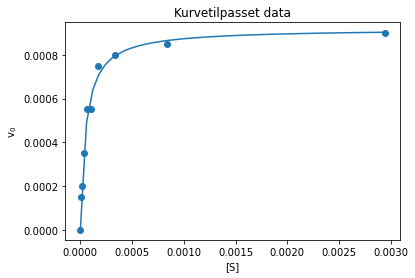

In [8]:
plt.plot(xModel, yModel)
plt.scatter(S,v)
plt.title('Kurvetilpasset data')
plt.xlabel('[S]')
plt.ylabel('v$_0$')
Vmax, Km = pars
print(('Ved bruk av kurvetilpassning er Vmax:{} og Km:{}').format(Vmax, Km))



### 3. Bedømme Km og Vmax med Lineweaver-Burke 

Lineweaver-Burke er en transformering av den hyperbole Michaelis-Menten funksjonen til en lineær funksjon, dette gjøres ved å gjennomføre en resiprokal av Michaelis-Menten funksjonen. Vi kan ved bruk av denne metoden bestemme Vmax fra y-akseen og Km fra stigningstallet.  



In [9]:
print(data)

          0        1   2   3
0  0.000000  0.00000 NaN NaN
1  0.000008  0.00015 NaN NaN
2  0.000017  0.00020 NaN NaN
3  0.000034  0.00035 NaN NaN
4  0.000068  0.00055 NaN NaN
5  0.000101  0.00055 NaN NaN
6  0.000169  0.00075 NaN NaN
7  0.000337  0.00080 NaN NaN
8  0.000840  0.00085 NaN NaN
9  0.002940  0.00090 NaN NaN


For å kunne gjennomføre en resiprokal, så må vi modifisere dataen litt siden vi kan ikke dele på 0, vi må derfor fjerne en rad fra de eksperimentelle dataene. I python kan vi gjøre dette ved å endre på hvor mye vi leser inn i en variabel 

In [10]:
ENoverS = np.array((1/data[0][1:])).reshape(-1,1)
ENoverv = np.array((1/data[1][1:])).reshape(-1,1)



print(ENoverS,ENoverv)

[[119047.61904762]
 [ 59171.59763314]
 [ 29673.59050445]
 [ 14814.81481481]
 [  9900.99009901]
 [  5917.15976331]
 [  2967.35905045]
 [  1190.47619048]
 [   340.13605442]] [[6666.66666667]
 [5000.        ]
 [2857.14285714]
 [1818.18181818]
 [1818.18181818]
 [1333.33333333]
 [1250.        ]
 [1176.47058824]
 [1111.11111111]]


Text(0, 0.5, '1/[S]')

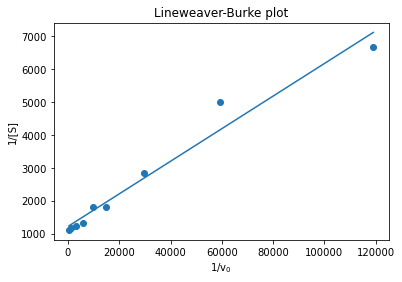

In [11]:
plt.scatter(ENoverS,ENoverv)
lineærRegresjon = LinearRegression()
lineærRegresjon.fit(ENoverS,ENoverv)
Predikert_data = lineærRegresjon.predict(ENoverS)

plt.plot(ENoverS, Predikert_data)
plt.title('Lineweaver-Burke plot')
plt.xlabel('1/v$_0$')
plt.ylabel('1/[S]')

In [12]:
y_skjæringspunkt = lineærRegresjon.intercept_
stigningstall = lineærRegresjon.coef_

Vmax = 1/y_skjæringspunkt
Km = Vmax*stigningstall

print(('Ved bruk av Lineweaver-Burke er Vmax:{} og Km:{}').format(Vmax, Km))

Ved bruk av Lineweaver-Burke er Vmax:[0.00081683] og Km:[[4.03767514e-05]]
